In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


In [2]:
train_dir = "D:/ai/3-cigarette-species/training/training"
valid_dir = "D:/ai/3-cigarette-species/validation/validation"
label_file = "D:/ai/3-cigarette-species/cigarette_labels.txt"
print(os.path.exists(train_dir))
print(os.listdir(train_dir))

True
['c1', 'c2', 'c3']


In [3]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label    Item Code             Item Name                     \
0  c1                  690102805            yuxi                 
1  c2                  690102832             zhonghua            
2  c3                  690100000      hongtashan                 

    Train Images    Validation Images  
0             180                  13  
1             132                  13  
2             143                  13  


In [4]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 3

In [5]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

Found 416 images belonging to 3 classes.


In [6]:
train_num = train_generator.samples
print(train_num)

416


In [7]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")

Found 39 images belonging to 3 classes.


In [8]:
valid_num = valid_generator.samples
print(valid_num)

39


In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

In [10]:
epochs = 10
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 6 steps, validate for 1 steps
Epoch 1/10
6/6 [==============================] - 21s 4s/step - loss: 1.0668 - accuracy: 0.4318 - val_loss: 0.8078 - val_accuracy: 0.6410
Epoch 2/10
6/6 [==============================] - 23s 4s/step - loss: 0.8970 - accuracy: 0.6534 - val_loss: 0.7573 - val_accuracy: 0.6410
Epoch 3/10
6/6 [==============================] - 25s 4s/step - loss: 0.7723 - accuracy: 0.6136 - val_loss: 0.6842 - val_accuracy: 0.5641
Epoch 4/10
6/6 [==============================] - 26s 4s/step - loss: 0.6489 - accuracy: 0.6771 - val_loss: 0.5191 - val_accuracy: 0.7436
Epoch 5/10
6/6 [==============================] - 22s 4s/step - loss: 0.6122 - accuracy: 0.6676 - val_loss: 0.4766 - val_accuracy: 0.7692
Epoch 6/10
6/6 [==============================] - 23s 4s/step - loss: 0.5205 - accuracy: 0.7240 - val_loss: 0.4616 - val_accuracy: 0.7949
Epoch 

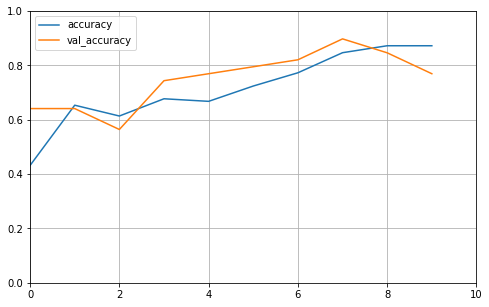

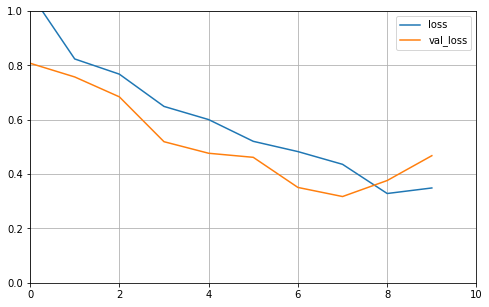

In [11]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 1)

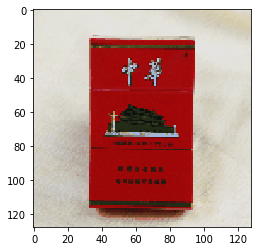

In [23]:
img = image.load_img("D:/ai/3-cigarette-species/test/0003.jpg", target_size = (128, 128))
plt.imshow(img)

In [24]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
preds = model.predict(img)
preds

array([[1., 0., 0.]], dtype=float32)

In [ ]:
for value in valid_generator:
    print(value[0])

In [ ]:
valid_generator.__len__()